In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import tensorflow 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential,Model
from tensorflow.keras.optimizers import Adam,SGD
from keras.callbacks import ReduceLROnPlateau
from keras.applications.vgg16 import VGG16
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout,Dense,ReLU,Softmax

In [2]:
train_path = r'D:\Final Year Project\Express-U\data\live_dataset\test'
test_path = r'D:\Final Year Project\Express-U\data\live_dataset\train' 

In [3]:
train_batches = ImageDataGenerator(preprocessing_function= tensorflow.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(64,64), class_mode='categorical', batch_size=10,shuffle=True)
test_batches = ImageDataGenerator(preprocessing_function=tensorflow.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(64,64), class_mode='categorical', batch_size=10, shuffle=True)

Found 1435 images belonging to 35 classes.
Found 24535 images belonging to 35 classes.


In [4]:
imgs, labels = next(train_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

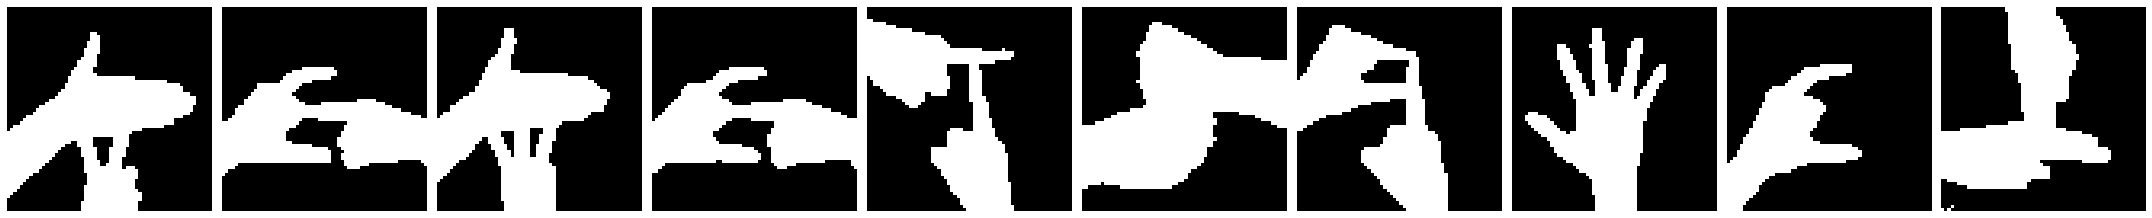

(10, 64, 64, 3)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [5]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(imgs.shape)
print(labels)

In [27]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(35,activation ="softmax"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [8]:
model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0005)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto') 

In [10]:
history2 = model.fit(train_batches, epochs=10, callbacks=[reduce_lr, early_stop],  validation_data = test_batches) 

Epoch 1/10
144/144 [==============================] - 138s 963ms/step - loss: 0.0169 - accuracy: 1.0000 - val_loss: 1.0804 - val_accuracy: 0.7502 - lr: 0.0010
Epoch 2/10
144/144 [==============================] - 37s 258ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 1.0426 - val_accuracy: 0.7649 - lr: 0.0010
Epoch 3/10
144/144 [==============================] - 33s 232ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 1.0396 - val_accuracy: 0.7712 - lr: 0.0010
Epoch 4/10
144/144 [==============================] - 32s 227ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.0301 - val_accuracy: 0.7786 - lr: 0.0010
Epoch 5/10
144/144 [==============================] - 33s 230ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.0207 - val_accuracy: 0.7828 - lr: 0.0010
Epoch 6/10
144/144 [==============================] - 33s 227ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.0184 - val_accuracy: 0.7859 - lr: 0.0010
Epoch 7/10
144/144 [==============================]

In [11]:
imgs, labels = next(test_batches) 
model.evaluate(imgs, labels, verbose=0)


[0.2607731819152832, 0.8999999761581421]

In [12]:
model.save('model_second.h5')

In [28]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

In [29]:
history3 = model.fit(train_batches, epochs=10, callbacks=[reduce_lr, early_stop],  validation_data = test_batches) 

Epoch 1/10
144/144 [==============================] - 58s 400ms/step - loss: 1.6203 - accuracy: 0.7282 - val_loss: 1.2224 - val_accuracy: 0.7483 - lr: 0.0010
Epoch 2/10
144/144 [==============================] - 32s 225ms/step - loss: 0.0577 - accuracy: 0.9895 - val_loss: 0.7254 - val_accuracy: 0.8306 - lr: 0.0010
Epoch 3/10
144/144 [==============================] - 32s 226ms/step - loss: 1.3150e-04 - accuracy: 1.0000 - val_loss: 0.6227 - val_accuracy: 0.8637 - lr: 0.0010
Epoch 4/10
144/144 [==============================] - 32s 224ms/step - loss: 1.3864e-05 - accuracy: 1.0000 - val_loss: 0.6716 - val_accuracy: 0.8643 - lr: 0.0010
Epoch 5/10
144/144 [==============================] - 32s 221ms/step - loss: 6.6219e-06 - accuracy: 1.0000 - val_loss: 0.6707 - val_accuracy: 0.8660 - lr: 2.0000e-04


In [30]:
imgs, labels = next(test_batches) 
model.evaluate(imgs, labels, verbose=0)

[0.2331136018037796, 0.8999999761581421]

In [31]:
model.save('model_second_adam.h5')

VGG16 MODEL

In [14]:
IMAGE_SIZE = [64, 64]
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False

In [16]:
x = Flatten()(vgg.output)
prediction = Dense(35, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [17]:
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [19]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

In [20]:
history2 = model.fit(train_batches, epochs=10, callbacks=[reduce_lr, early_stop],  validation_data = test_batches) 

Epoch 1/10
144/144 [==============================] - 225s 2s/step - loss: 2.4909 - accuracy: 0.8606 - val_loss: 0.4487 - val_accuracy: 0.9174 - lr: 0.0010
Epoch 2/10
144/144 [==============================] - 222s 2s/step - loss: 8.5592e-04 - accuracy: 1.0000 - val_loss: 0.3638 - val_accuracy: 0.9287 - lr: 0.0010
Epoch 3/10
144/144 [==============================] - 219s 2s/step - loss: 7.3005e-05 - accuracy: 1.0000 - val_loss: 0.3434 - val_accuracy: 0.9334 - lr: 0.0010
Epoch 4/10
144/144 [==============================] - 222s 2s/step - loss: 3.5255e-05 - accuracy: 1.0000 - val_loss: 0.3316 - val_accuracy: 0.9358 - lr: 0.0010
Epoch 5/10
144/144 [==============================] - 235s 2s/step - loss: 2.5601e-05 - accuracy: 1.0000 - val_loss: 0.3225 - val_accuracy: 0.9376 - lr: 0.0010
Epoch 6/10
144/144 [==============================] - 232s 2s/step - loss: 2.0222e-05 - accuracy: 1.0000 - val_loss: 0.3149 - val_accuracy: 0.9390 - lr: 0.0010
Epoch 7/10
144/144 [========================

In [21]:
imgs, labels = next(test_batches) 
model.evaluate(imgs, labels, verbose=0)

[0.01515552680939436, 1.0]

In [22]:
model.save('model_second_vgg16.h5')